# Prepare datasets

In [ ]:
!gdown --id 1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk
From (redirected): https://drive.google.com/uc?id=1Do8SXKm4rmXW-phHlejV-udLfhSyYgKk&confirm=t&uuid=4b6a84f9-ff62-4727-ac28-015e2b5123a2
To: /content/animals10small.zip
100% 46.3M/46.3M [00:01<00:00, 43.0MB/s]


In [ ]:
!rm -rf animals10small/
!unzip -q animals10small.zip

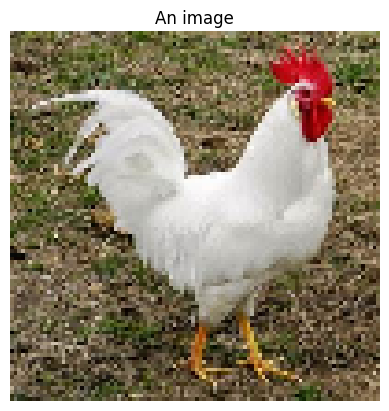

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_image(image, title="An image", figsize=(3,3)):
  plt.figure()
  if image.ndim == 2:
    plt.imshow(image, cmap="gray")
  elif image.ndim == 3:
    plt.imshow(image)
  else:
    raise Exception("Invalid image dimension")

  plt.axis("off")
  plt.title(title)
  plt.show()

path = "animals10small/data"
files = ["chicken/10.jpeg",
         "chicken/100.jpeg",
         "cat/1.jpeg",
         "cat/10.jpeg"]
fnames = [os.path.join(path, fn) for fn in files]
rgb = [cv2.imread(fn, 1) for fn in fnames]
rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in rgb]
rgb = [cv2.resize(im, (100, 100)) for im in rgb]

show_image(rgb[0])



```
# This is formatted as code
```

# Numy functions and operators

In [ ]:
A = np.random.randint(0, 10, (5, 4))
x = np.random.randint(0, 10, (4, ))
B = np.random.randint(0, 10, (4, 3))


In [ ]:
A

array([[3, 1, 7, 6],
       [1, 2, 2, 1],
       [8, 4, 3, 3],
       [6, 0, 9, 3],
       [5, 0, 7, 5]])

In [ ]:
x

array([9, 3, 8, 3])

In [ ]:
B

array([[2, 8, 3],
       [4, 1, 9],
       [8, 6, 6],
       [5, 2, 1]])

In [ ]:
y = A*x

array([104,  34, 117, 135, 116])

In [ ]:
A @ B

array([[ 96,  79,  66],
       [ 31,  24,  34],
       [ 71,  92,  81],
       [ 99, 108,  75],
       [ 91,  92,  62]])

## Example - sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=10)
model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=10)

In [ ]:
model.coefs_
W1, W2, W3 = model.coefs_
b1, b2, b3 = model.intercepts_
W1.shape

(4, 5)

In [ ]:
X.shape

(150, 4)

In [ ]:
Y1 = X@W1 + b1
Y1.shape
Y2 = Y1@W2 + b2
Y2.shape
Y3 = Y2@W3 + b3
Y3.shape

(150, 3)

## Example

In [ ]:
X.dtype

dtype('float64')

In [ ]:
import torch
import torch.nn as nn

linear = nn.Linear(in_features=4, out_features=3)
X_tensor = torch.Tensor(X) # X: numpy -> torch.Tensor
Y_tensor = linear(X_tensor)
Y_numpy = Y_tensor.detach().numpy() # torch.Tensor -> numpy
Y_numpy.shape

(150, 3)

## CLIP

In [ ]:
E1 = np.random.randint(0, 10, (5, 3))
E2 = np.random.randint(0, 10, (5, 3))
SCORE = E1@E2.T
SCORE

array([[ 19,   9,   6,   9,  40],
       [ 53,  79,  80,  87, 115],
       [ 56,  40,  48,  40,  32],
       [ 35,  74,  75,  83,  98],
       [ 72,  88,  86,  96, 155]])

## einsum

In [ ]:
E1

array([[4, 0, 1],
       [3, 8, 4],
       [0, 0, 8],
       [1, 9, 2],
       [7, 8, 5]])

In [ ]:
E2

array([[3, 2, 7],
       [1, 7, 5],
       [0, 7, 6],
       [1, 8, 5],
       [9, 9, 4]])

In [ ]:
Y = np.einsum("ij,kj->ik", E1, E2)
Y

array([[ 19,   9,   6,   9,  40],
       [ 53,  79,  80,  87, 115],
       [ 56,  40,  48,  40,  32],
       [ 35,  74,  75,  83,  98],
       [ 72,  88,  86,  96, 155]])

In [ ]:
Y = np.einsum("ij,kj->ikj", E1, E2)
Y.shape

(5, 5, 3)

In [ ]:
A = np.random.randint(0, 10, (5, 4, 6))
B = np.random.randint(0, 10, (4, 3, 6))
Y = np.einsum("ijk,lmk->lmij", A, B)
Y.shape


(4, 3, 5, 4)

In [ ]:
A = np.random.randint(0, 10, (5, 4, 6))
s = np.random.randint(0, 10, (6,))
As = np.einsum("ijk,k->ikj", A, s)
As.shape

(5, 6, 4)

In [ ]:
A.shape

(5, 4, 6)

In [ ]:
np.einsum("ijk->i", A)

array([ 95, 131, 125, 122, 130])

# Indexing and Slicing

In [ ]:
type(rgb)

list

In [ ]:
len(rgb)

4

In [ ]:
for v in rgb:
  print(v.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


In [ ]:
# combine into a batch: (4, 3, 100, 100)
np.stack([rgb[0], rgb[1]]).shape

(2, 100, 100, 3)

In [ ]:
np.hstack([rgb[0], rgb[1]]).shape

(100, 200, 3)

In [ ]:
np.vstack([rgb[0], rgb[1]]).shape

(200, 100, 3)

In [ ]:
np.dstack([rgb[0], rgb[1]]).shape

(100, 100, 6)

In [ ]:
np.concatenate([rgb[0], rgb[1]], axis=0).shape

(200, 100, 3)

In [ ]:
np.concatenate([np.expand_dims(rgb[0], axis=0), np.expand_dims(rgb[1], axis=0)], axis=0).shape

(2, 100, 100, 3)

In [ ]:
batch = np.stack(rgb)
batch.shape

(4, 100, 100, 3)

In [ ]:
batch[0].shape

(100, 100, 3)

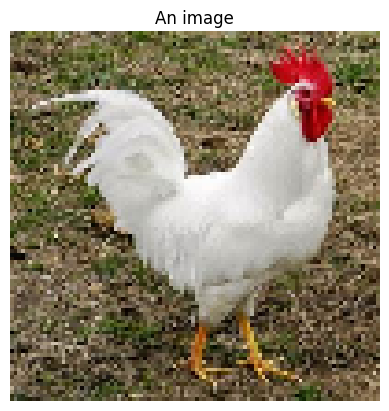

In [ ]:
show_image(batch[0])

In [ ]:
batch[0, :, :, :].shape

(100, 100, 3)

In [ ]:
batch[0, ...].shape

(100, 100, 3)

In [ ]:
batch[0].shape

(100, 100, 3)

In [ ]:
batch.shape

(4, 100, 100, 3)

In [ ]:
#red channel
batch[..., 0].shape

(4, 100, 100)

In [ ]:
batch[:, :, :, 0].shape

(4, 100, 100)

In [ ]:
#red and green channel
batch[..., (0,1)].shape

(4, 100, 100, 2)

In [ ]:
## indexing vs slicing

In [ ]:
x = np.random.randint(0, 10, (10,))

In [ ]:
x

array([9, 2, 4, 2, 2, 8, 8, 3, 7, 5])

In [ ]:
y1 = x[[0, 3, 5, 7]]
y1

array([9, 2, 8, 3])

In [ ]:
y2=x[0:4]
y2

array([9, 2, 4, 2])

In [ ]:
y1[0] = 999
print(y1); print(x)

[999   2   8   3]
[9 2 4 2 2 8 8 3 7 5]


In [ ]:
y2[0] = 888
print(y2); print(x)

[888   2   4   2]
[888   2   4   2   2   8   8   3   7   5]


In [ ]:
y3=x[0:4].copy()
y3

array([888,   2,   4,   2])

In [ ]:
y3[0] = 7777
print(y3); print(x)

[7777    2    4    2]
[888   2   4   2   2   8   8   3   7   5]


## indices

In [ ]:
L = list("ABCDE")
L

['A', 'B', 'C', 'D', 'E']

In [ ]:
L[0]

'A'

In [ ]:
L[-1]

'E'

In [ ]:
L[0:3]

['A', 'B', 'C']

In [ ]:
L[:2]

['A', 'B']

In [ ]:
L[-2:]

['D', 'E']

In [ ]:
x

array([888,   2,   4,   2,   2,   8,   8,   3,   7,   5])

In [ ]:
x[5:]

array([8, 8, 3, 7, 5])

In [ ]:
x[-5:]

array([8, 8, 3, 7, 5])

In [ ]:
x[0:5:2]

array([888,   4,   2])

In [ ]:
x[0::2]

array([888,   4,   2,   8,   7])

In [ ]:
x[::-1]

array([  5,   7,   3,   8,   8,   2,   2,   4,   2, 888])

## Example

In [ ]:
batch.shape

(4, 100, 100, 3)

In [ ]:
np.mean(batch[...,0])

np.float64(159.4179)

In [ ]:
np.mean(batch, axis=(0,1,2))[0]

np.float64(159.4179)

In [ ]:
batch[:,1::2,0::2,:].shape

(4, 50, 50, 3)

In [ ]:
batch[:,1::2,0::2].shape

(4, 50, 50, 3)

### Erase red and blue channel

In [ ]:
batch1 = batch.copy()
batch1.shape

(4, 100, 100, 3)

In [ ]:
batch1[..., (0,2)] = 0 #broadcast

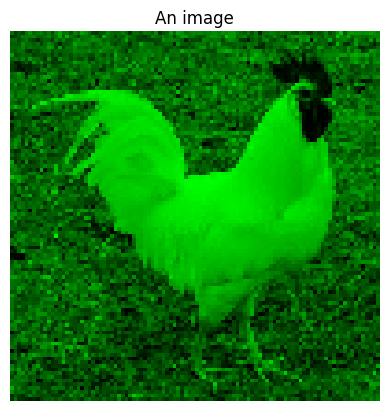

In [ ]:
show_image(batch1[0])

## Using Mask

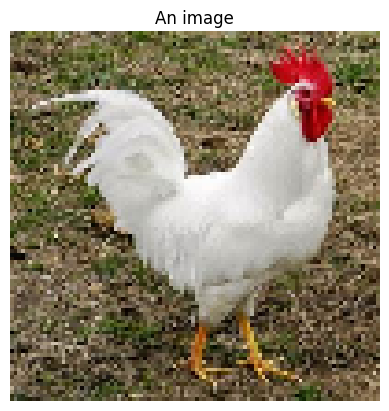

In [ ]:
show_image(batch[0])

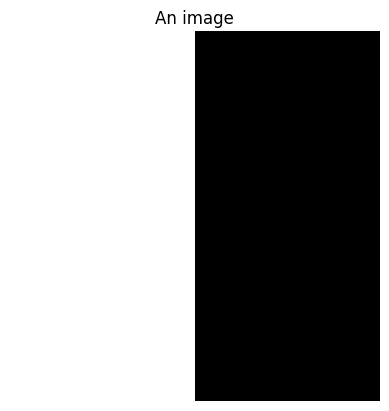

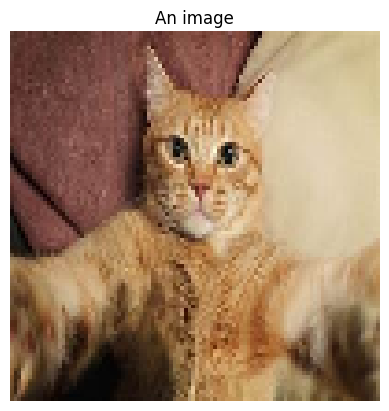

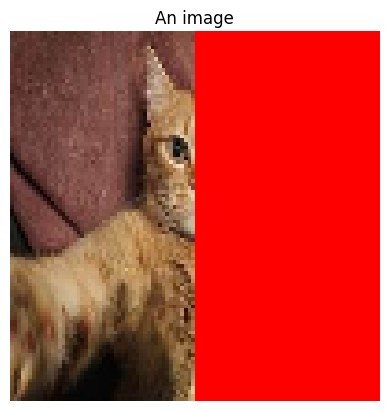

In [ ]:
mask = np.ones(batch[0].shape[:2], dtype=np.bool)
H, W = mask.shape
mask[:,-W//2:] = 0
show_image(mask)
image = batch[2].copy()
show_image(image)
image[~mask] = [255, 0, 0]
show_image(image)

## meshgrid

In [ ]:
xx = np.arange(-2, 4, 1)
yy = np.arange(-2, 3, 1)
yy

array([-2, -1,  0,  1,  2])

In [ ]:
X, Y = np.meshgrid(xx, yy)
X

array([[-2, -1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2,  3]])

In [ ]:
Y

array([[-2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2]])

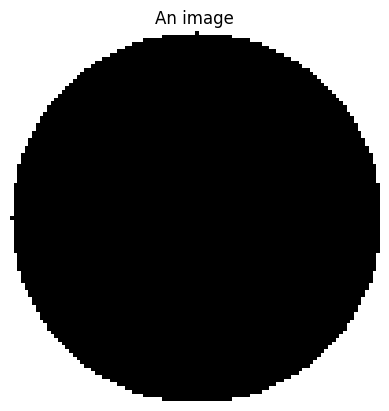

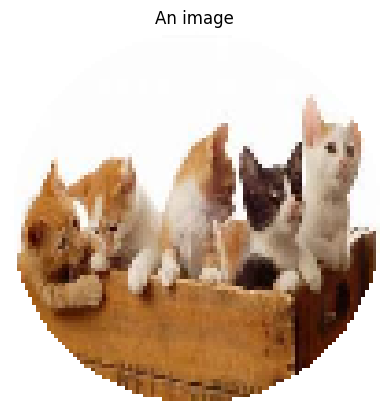

In [ ]:
image = batch[3].copy()
H, W, _ = image.shape
xx = np.arange(0, W, 1) - W//2
yy = np.arange(0, H, 1) - H//2
X, Y = np.meshgrid(xx, yy)
f = X**2 + Y**2
mask = f > (W//2)**2
show_image(mask)
image[mask] = 255
show_image(image)

## Using pairs of indices

In [ ]:
A = np.random.randint(0, 10, (5,4))
A

array([[6, 8, 6, 6],
       [2, 2, 7, 5],
       [6, 4, 2, 9],
       [3, 5, 3, 1],
       [4, 5, 7, 0]])

In [ ]:
r = [0, 1, 4]
c = [0, 2, 3]
A[r,c]

array([6, 7, 0])

### Crossentropy

In [ ]:
def softmax(X, axis=-1):
  X = X - np.max(X, axis=axis, keepdims=True)
  return np.exp(X) / np.sum(np.exp(X), axis=axis, keepdims=True)

In [ ]:
Y = np.random.randint(0, 10, (5, 3))
Y

array([[2, 3, 6],
       [4, 7, 5],
       [5, 4, 9],
       [6, 0, 0],
       [1, 7, 2]])

In [ ]:
Z = softmax(Y)

In [ ]:
Z

array([[0.01714783, 0.04661262, 0.93623955],
       [0.04201007, 0.84379473, 0.1141952 ],
       [0.01786798, 0.00657326, 0.97555875],
       [0.99506695, 0.00246652, 0.00246652],
       [0.00245611, 0.99086747, 0.00667641]])

In [ ]:
Z.sum(axis=-1)

array([1., 1., 1., 1., 1.])

In [ ]:
target = [0, 2, 2, 1, 0]

In [ ]:
r = np.arange(Z.shape[0])
score_sel = Z[r, target]
score_sel

array([0.01714783, 0.1141952 , 0.97555875, 0.00246652, 0.00245611])

In [ ]:
loss = (-np.log(score_sel)).sum()
loss

np.float64(18.27459455443577)

### more ...

In [ ]:
A

array([[6, 8, 6, 6],
       [2, 2, 7, 5],
       [6, 4, 2, 9],
       [3, 5, 3, 1],
       [4, 5, 7, 0]])

In [ ]:
r = np.random.randint(0, A.shape[0], (3, 4))
c = np.random.randint(0, A.shape[1], (3, 4))
SelA = A[r, c]
SelA.shape

(3, 4)

In [ ]:
batch.shape

(4, 100, 100, 3)

In [ ]:
N, S, D = 50, 100, 64
B = np.random.randint(0, 10, (N, S, D))
# select class-token
CLS_B = B[:,0]
CLS_B.shape

(50, 64)

In [ ]:
mean_B = np.mean(B[:, 1:], axis=1)
mean_B.shape

(50, 64)